In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.7 MB/s eta 0:00:00


In [ ]:

from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Vehicle\ Recognizer

/content/drive/MyDrive/Vehicle Recognizer


In [ ]:
doc(search_images_ddg)

In [ ]:
vehicle_labels = [
    "car",
    "motorcycle",
    "bicycle",
    "truck",
    "bus",
    "van",
    "rickshaw",
    "scooter",
    "skateboard",
    "ambulance",
    "fire truck",
    "tractor",
    "segway",
    "unicycle",
    "jet ski",
    "helicopter",
    "airplane",
    "boat",
    "kayak",
    "hovercraft"
]
len(vehicle_labels)

20

In [ ]:
data_path = "vehicle_data"
if not os.path.exists(data_path):
    os.mkdir(data_path)

for vehicle_type in vehicle_labels:

    dest = f"{data_path}/{vehicle_type.replace(' ', '_')}"
    if not os.path.exists(dest):
        os.mkdir(dest)

    try:
        vehicle_image_urls = search_images_ddg(vehicle_type)
        download_images(dest, urls=vehicle_image_urls)

    except Exception as e:
        print(f"Error downloading images for {vehicle_type}: {e}")
        continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#3810) [Path('vehicle_data/car/76ce3c3f-6c05-4a7b-a5ad-33c156d7bfc3.jpg'),Path('vehicle_data/car/4b4421c2-4e8e-4340-b99b-ee21a3d694d2.jpg'),Path('vehicle_data/car/532bf88c-7a84-4d8a-9af1-e3de7ee28fbc.png'),Path('vehicle_data/car/8b4c6861-c0d5-4148-9c5a-031c050adf44.jpg'),Path('vehicle_data/car/343c0014-9ddc-46e4-abb7-956a6fbe823b.jpg'),Path('vehicle_data/car/4dbac729-0bb8-4674-aac5-f5f4fe7b0817.jpg'),Path('vehicle_data/car/58b3ce0a-8c89-4471-9fa2-dc2eb1c50d02.jpeg'),Path('vehicle_data/car/04eeb5a6-383f-4821-a758-4254228b8f26.jpg'),Path('vehicle_data/car/bb9677db-8618-4310-867d-f4b006b9494a.jpg'),Path('vehicle_data/car/a4c1fd52-603a-4d2e-8669-f5479ec750fe.jpg')...]

In [ ]:
image_files = get_image_files(data_path)
print(f"Total Number of Images: {len(image_files)}")

Total Number of Images: 3810


In [ ]:
failed = verify_images(image_counts)
failed

(#89) [Path('vehicle_data/car/a3225a2b-1ee1-4296-942b-57f40c463654.png'),Path('vehicle_data/car/180a1f5c-4871-4f6d-ba33-595999655bad.png'),Path('vehicle_data/car/6c9f9745-1d49-43c9-9001-8d49ad1acb14.png'),Path('vehicle_data/car/42609cad-5fa0-4fef-a428-0f23efb6848b.jpg'),Path('vehicle_data/car/b4e8baa9-aec2-4d72-a66d-0fe90d8934e8.jpg'),Path('vehicle_data/car/68c4ed36-d624-4278-ad7b-0f3af4ce0732.jpg'),Path('vehicle_data/car/47e53b98-2441-45d3-812e-3c2e5fa33dd5.jpg'),Path('vehicle_data/motorcycle/39b4ee3c-e5fc-4813-b8c1-928d07ca8258.jpg'),Path('vehicle_data/motorcycle/c81fe6b4-58b3-4902-a0d9-91c6d7bdb695.jpg'),Path('vehicle_data/motorcycle/bec97308-eef9-46c0-be4a-c7349f8d9d20.jpg')...]

In [ ]:

failed.map(Path.unlink)

(#89) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
doc(get_image_files)

In [ ]:


dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


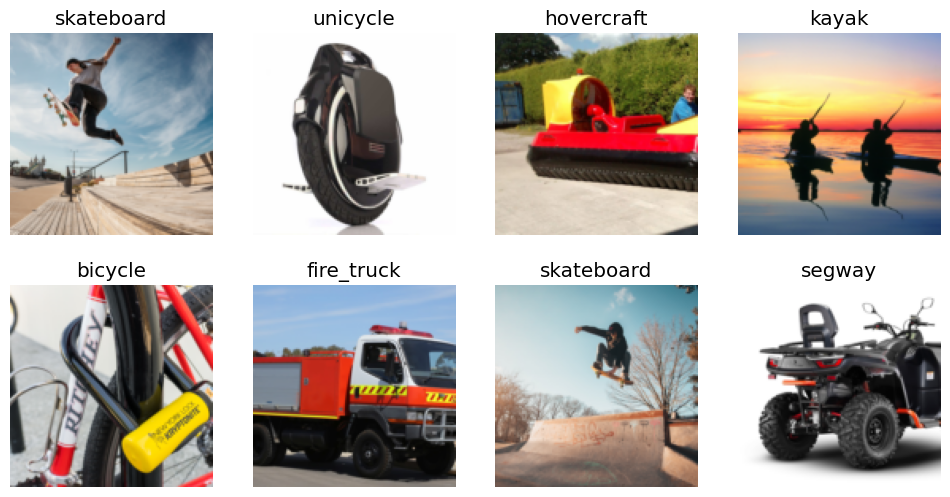

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

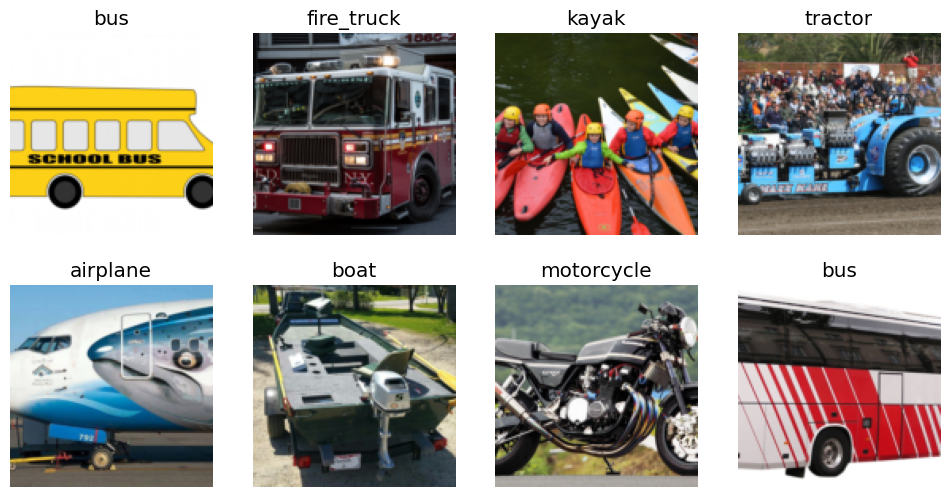

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

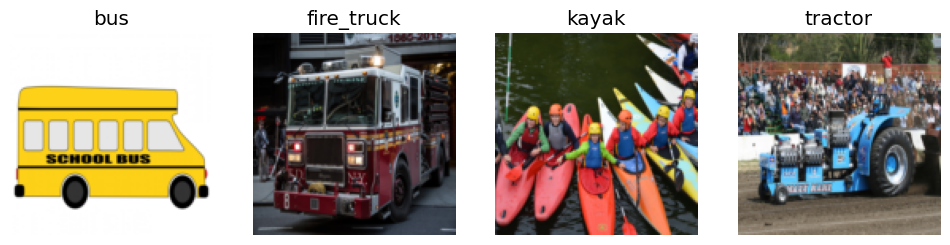

In [ ]:


dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)



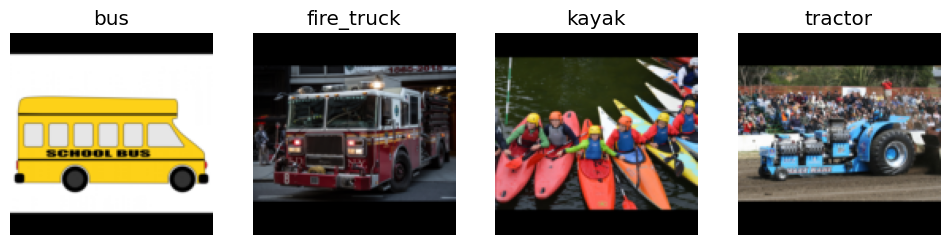

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

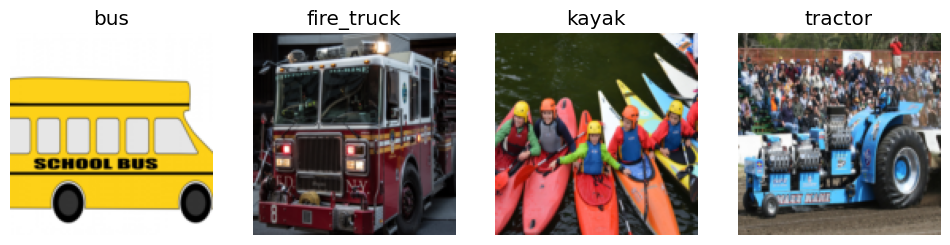

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
doc(aug_transforms)

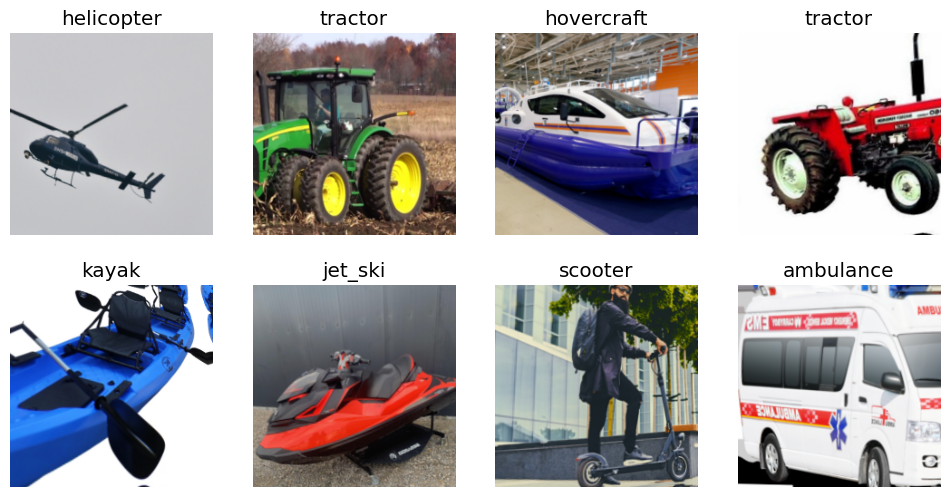

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "vehicle_dataloader_v0.pkl")